In [1]:
import tensorflow 

In [2]:
from tensorflow.keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words = 10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
print(train_data[8],end = "")

[1, 178, 53, 321, 26, 14, 948, 26, 178, 39, 44, 2860, 3820, 14, 191, 59, 11, 86, 539, 63, 11, 14, 892, 61, 11, 123, 197, 1245, 258, 44, 11, 15, 58, 462, 26, 53, 14, 597, 61, 11, 15, 58, 19, 942, 15, 53, 105, 39, 633, 472, 927, 53, 46, 22, 710, 220, 851, 2861, 9, 4297, 282, 5, 317, 65, 9, 659, 249, 2, 196, 47, 11, 428, 410, 61, 59, 20, 22, 10, 29, 254, 17, 12]

In [6]:
train_labels[8]

3

In [10]:
# ONE HOT ENCODING OF DATA(TRAIN AND TEST)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# ONE HOT ENCODING OF LABELS

from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
# NETWORK ARCHITECTURE

from tensorflow.keras import models
from tensorflow.keras import layers

model =models.Sequential()
model.add(layers.Dense(64, activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
# NETWORK COMPILATION

model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [13]:
# VALIDATION

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
# TRAINING THE MODEL

history= model.fit(partial_x_train,partial_y_train,epochs = 20,batch_size = 512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 197us/sample - loss: 2.7103 - acc: 0.5014 - val_loss: 1.8119 - val_acc: 0.6280
Epoch 2/20
7982/7982 [==============================] - 1s 138us/sample - loss: 1.4543 - acc: 0.6979 - val_loss: 1.3013 - val_acc: 0.7230
Epoch 3/20
7982/7982 [==============================] - 1s 138us/sample - loss: 1.0429 - acc: 0.7766 - val_loss: 1.1187 - val_acc: 0.7570
Epoch 4/20
7982/7982 [==============================] - 1s 135us/sample - loss: 0.8123 - acc: 0.8310 - val_loss: 1.0278 - val_acc: 0.7790
Epoch 5/20
7982/7982 [==============================] - 1s 134us/sample - loss: 0.6424 - acc: 0.8696 - val_loss: 0.9402 - val_acc: 0.8120
Epoch 6/20
7982/7982 [==============================] - 1s 128us/sample - loss: 0.5114 - acc: 0.8925 - val_loss: 0.9113 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 128us/sample - loss: 0.4123 - acc: 0.9123 - val_loss: 0.8940 - va

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

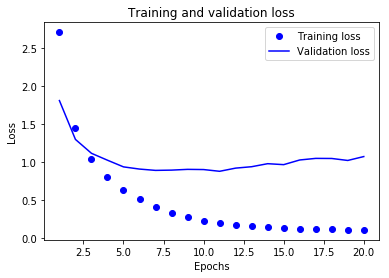

In [17]:
# PLOTTING GRAPH BETWEEN TRAINING LOSS AND VALIDATION LOSS 
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

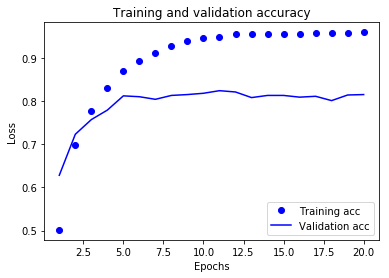

In [18]:
# PLOTTING GRAPH BETWEEN TRAINING ACCURACY AND VALIDATION ACCURACY
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 171us/sample - loss: 1.2222 - acc: 0.7863


In [23]:
# MODEL FROM SCRATCH

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=11,
batch_size=512,
validation_data=(x_val, y_val))
print("\n")
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/11
7982/7982 [==============================] - 1s 172us/sample - loss: 2.6685 - acc: 0.5400 - val_loss: 1.7460 - val_acc: 0.6480
Epoch 2/11
7982/7982 [==============================] - 1s 133us/sample - loss: 1.4265 - acc: 0.7028 - val_loss: 1.2948 - val_acc: 0.7120
Epoch 3/11
7982/7982 [==============================] - 1s 128us/sample - loss: 1.0424 - acc: 0.7811 - val_loss: 1.1117 - val_acc: 0.7630
Epoch 4/11
7982/7982 [==============================] - 1s 132us/sample - loss: 0.8198 - acc: 0.8285 - val_loss: 1.0240 - val_acc: 0.7820
Epoch 5/11
7982/7982 [==============================] - 1s 126us/sample - loss: 0.6467 - acc: 0.8675 - val_loss: 0.9753 - val_acc: 0.8050
Epoch 6/11
7982/7982 [==============================] - 1s 127us/sample - loss: 0.5177 - acc: 0.8939 - val_loss: 0.9063 - val_acc: 0.8130
Epoch 7/11
7982/7982 [==============================] - 1s 140us/sample - loss: 0.4149 - acc: 0.9167 - val_loss: 0.8849 - va